In [168]:
import numpy as np

import matplotlib.pyplot as plt
from oct2py import octave
%matplotlib nbagg
import scipy.io as io
import matfile as mf
plt.style.use('ggplotjmk')
from jmkfigure import *
import hdf5storage
ray=mf.loadmatbunch ('../TasmaniaRays.mat')
ray = ray['ray']
rho0=1000.
def sublabel(axs,fontsize=9):
    '''
    sublabel(axs,fontsize=9):
    '''
    for nn,ax in enumerate(axs.flatten()):
        ax.text(0.05,1.-0.07,'%c)'%chr(ord('a')+nn),
                fontsize=fontsize,transform = ax.transAxes,
                color='#555555',
               bbox=dict(facecolor='w', edgecolor='None',
                        alpha=0.85))

In [3]:
def setup(nnx,width,maxdepth=5000,Nz=1700):
    omega = 2.*np.pi/12.4/3600.;f = -1.e-4;nu=1.e-3;
    Nm = 20
    Nx = nnx
    # Nz = ceil(Nm*2*Hmax/Hmin)
    rho0=1000.
    nx=300
    coast=0
    z = np.linspace(0,maxdepth,Nz)
    #z=np.logspace(np.log10(2.5),np.log10(5000.),Nz)
    N2 = np.ones((Nz,Nx+1))*(5.2e-3**2)
    N2 = np.interp(z,ray['z'],ray['N2'])
    N20=N2
    H0 = np.linspace(5000,125,Nx+1)
    X0 = np.linspace(-width,0.,Nx)*1.e3
    if Nx==1:
        X0 = np.array([0.])
    if coast:
        H0 = np.append(H0,[30.])
        X0 = np.append(X0,[30.e3])
        Nx +=1

    A0 = np.zeros((Nm,1))
    A0[1,0]=1.
    B0 = np.zeros((Nm,1))
    N2 = np.tile(N20,(Nx+1,1))

    x0 = np.linspace(-300.,100.,nx)*1e3
    x = np.zeros((nx,1))
    x[:,0]=x0

    y = 0.
    return H0,X0,A0,N2,omega,f,nu,x,y,z

Run CELT from python.   Basically runs Tas.m but in python.  

octave.CELTangJ()

## Constant Strat Two steps

In [16]:
omega = 2.*np.pi/12.4/3600.;f = -1.e-4;nu=1.e-3;
Nm = 30
Nx = 2
Nz = 400
nx=300

In [17]:

print ray.keys()
z = np.linspace(0,5000.,Nz)
#z=np.logspace(np.log10(2.5),np.log10(5000.),Nz)
N2 = np.ones((Nz,Nx+1))*(5.2e-3**2)
N2 = np.interp(z,ray['z'],ray['N2'])
N20=N2

['om', 'f', 'dzdx', 'x', 'N2', 'z']


In [5]:
N2 = np.tile(N20,(Nx+1,1))

H0 = np.array([5000,400.])
X0 = np.array([0.])*1.e3
A0 = np.zeros((Nm,1))
A0[1,0]=1.
B0 = np.zeros((Nm,1))

x0 = np.linspace(-100.,130.,nx)*1e3
x = np.zeros((nx,1))
x[:,0]=x0

y = 0.


In [11]:
ang = 0.

#[u1,p1,h1,A1,B1,c1]=octave.CELT(H0,X0,A0,B0,N2,omega,f,nu,x,z)
[u,p,h,A,B,c,k,K]=octave.CELTangJ2(H0,X0,A0,N2,omega,f,nu,x,y,z,ang)
print k[1],K[1]

[  3.50856359e-05   1.91785471e-04] [  3.50856359e-05   1.91785471e-04]


In [260]:
Fin = c*np.abs(A)**2*np.real(k/K)*H0*0.5*rho0
Fref = c*np.abs(B)**2*np.real(k/K)*H0*0.5*rho0
#Fin1 = c1*np.abs(A1)**2*H0*0.5*rho0
#Fref1 = c1*np.abs(B1)**2*H0*0.5*rho0
print (Fin/Fin[1,0])[0:6,:]
print sum(Fin/Fin[1,0])

print (Fref/Fin[1,0])[0:6,:]
print sum(Fref/Fin[1,0])



[[  0.00000000e+00   3.64142441e-02]
 [  1.00000000e+00   3.13433021e-03]
 [  0.00000000e+00   6.18931572e-04]
 [  0.00000000e+00   2.26814888e-04]
 [  0.00000000e+00   1.02173771e-04]
 [  0.00000000e+00   6.13161839e-05]]
[ 1.          0.04076432]
[[  1.09532807e-02   0.00000000e+00]
 [  9.44057098e-01   0.00000000e+00]
 [  5.09176768e-04   0.00000000e+00]
 [  1.07058245e-03   0.00000000e+00]
 [  1.32124358e-03   0.00000000e+00]
 [  6.15421204e-04   0.00000000e+00]]
[ 0.95923568  0.        ]


<IPython.core.display.Javascript object>


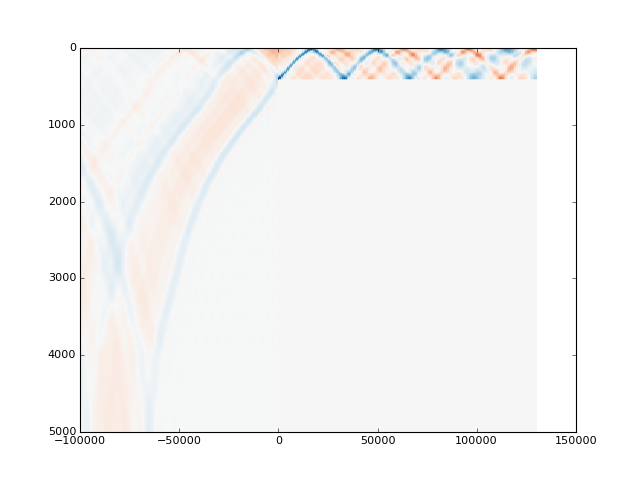

(5000, 0)

In [261]:
fig,ax=plt.subplots()
pcm=ax.pcolormesh(x.flatten(),z,np.real(u.T),rasterized=True,cmap=plt.cm.RdBu_r)
pcm.set_clim([-2.,2.])
ax.set_ylim([5000,0])


## Do for a realistic topo

In [8]:
for nnx in [40]:
    omega = 2.*np.pi/12.4/3600.;f = -1.e-4;nu=1.e-3;
    Nm = 20
    Nx = nnx
    # Nz = ceil(Nm*2*Hmax/Hmin)
    Nz = 1700
    rho0=1000.
    nx=300
    coast=0
    z = np.linspace(0,5000.,Nz)
    #z=np.logspace(np.log10(2.5),np.log10(5000.),Nz)
    N2 = np.ones((Nz,Nx+1))*(5.2e-3**2)
    N2 = np.interp(z,ray['z'],ray['N2'])
    N20=N2
    H0 = np.linspace(5000,125,Nx+1)
    X0 = np.linspace(-40,0.,Nx)*1.e3
    if coast:
        H0 = np.append(H0,[30.])
        X0 = np.append(X0,[30.e3])
        Nx +=1

    A0 = np.zeros((Nm,1))
    A0[1,0]=1.
    B0 = np.zeros((Nm,1))
    N2 = np.tile(N20,(Nx+1,1))

    x0 = np.linspace(-100.,130.,nx)*1e3
    x = np.zeros((nx,1))
    x[:,0]=x0

    y = 0.
    ang=30.
    #[u,p,h,A,B,c,k,K]=octave.CELTang(H0,X0,A0,N2,omega,f,nu,x,y,z,ang)
    [u1,p1,h1,A1,B1,c1,k1,K1]=octave.CELTang(H0,X0,A0,N2,omega,f,nu,x,y,z,ang)

    
    
    #Fin1 = c1*np.abs(A1)**2*H0*0.5*rho0
    #Fref1 = c1*np.abs(B1)**2*H0*0.5*rho0
    #print (Fin/Fin[1,0])[0:6,1]

In [9]:
    Fin = c1*np.abs(A1)**2*np.real(k1/K1)*H0*0.5*rho0
    Fref = c1*np.abs(B1)**2*np.real(k1/K1)*H0*0.5*rho0
    print shape(Fin)
    print shape((np.sum(Fin/Fin[1,0],axis=0)))
    print 'JMK'
    print 'In: %1.2f, %1.2f'%(sum(Fin/Fin[1,0],axis=0)[0],sum(Fin/Fin[1,0],axis=0)[-1])
    print 'Ref %1.2f, %1.2f'%(sum(Fin/Fin[1,0],axis=0)[0],(Fref[1,:]/Fin[1,0])[0])

    Fin = c*np.abs(A)**2*np.real(k/K)*H0*0.5*rho0
    Fref = c*np.abs(B)**2*np.real(k/K)*H0*0.5*rho0
    print 'NM %d Nz %d NX %d'%(Nm,Nz,Nx)
    print 'SK'
    print 'In: %1.2f, %1.2f'%(sum(Fin/Fin[1,0])[0],sum(Fin/Fin[1,0])[-1])
    print 'Ref %1.2f, %1.2f'%(sum(Fin/Fin[1,0])[0],(Fref[1,:]/Fin[1,0])[0])

(20, 2)
(2,)
JMK
In: 1.00, 0.00
Ref 1.00, 0.95


NameError: name 'c' is not defined

In [83]:
print c1[1,:]
print c[1,:]

[ 1.99832519  1.9828323   1.96282282  1.94411788  1.93331995  1.91320333
  1.89717463  1.87234889  1.8498862   1.82650229  1.8054762   1.7818424
  1.75197225  1.72809367  1.6973081   1.66780093  1.63602138  1.60072037
  1.56724872  1.52703694  1.48584167  1.4431726   1.39685391  1.34537814
  1.29114389  1.23292525  1.16907953  1.10263318  1.02827768  0.95051134
  0.86643046  0.7815619   0.69812746  0.62001585  0.55714934  0.50323122
  0.45439394  0.4003817   0.3349405   0.25771475  0.14801795]


NameError: name 'c' is not defined

In [84]:
print Fref[1:10,0]/Fin[1,0]

[  8.19440264e-01   1.12798948e-01   1.54274284e-02   1.28358366e-02
   1.05137942e-02   5.50352488e-04   1.33516299e-03   2.51094904e-03
   1.43777415e-03]


<IPython.core.display.Javascript object>


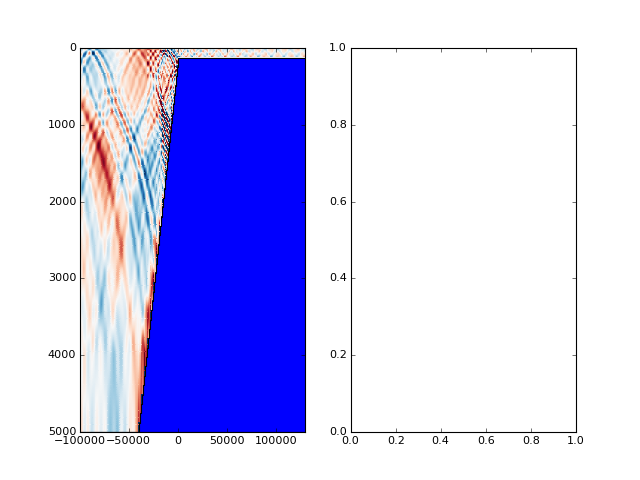

In [85]:
fig,axs=plt.subplots(1,2)
for ii in range(1):
    if ii==0:
        uu=u1.T
    else:
        uu = u1.T
    ax=axs[ii]
    pcm=ax.pcolormesh(x.flatten(),z,np.real(uu),rasterized=True,cmap=plt.cm.RdBu_r)
    pcm.set_clim([-2.,2.])
    ax.set_ylim([5000,0])
    xx=np.zeros(len(X0)*2+2);hh=np.zeros(len(X0)*2+2)
    xx[0]=-1e6;xx[-1]=1e6
    hh[0]=H0[0];hh[-1]=H0[-1]
    for ii in range(len(X0)):
        xx[2*ii+1]=X0[ii]
        hh[2*ii+1]=H0[ii]
        xx[2*ii+2]=X0[ii]
        hh[2*ii+2]=H0[ii+1]
    ax.fill_between(xx,hh,y2=5000)
    ax.set_xlim([np.min(x),np.max(x)])

## Now do for a series of thetas...

In [11]:
angles=np.array([0.,2.,3.5,5.,7.5,10.,20.,30.,45.,70.,85.])

omega = 2.*np.pi/12.4/3600.;f = -1.e-4;nu=1.e-3;
Nm = 20
Nx = 40
# Nz = ceil(Nm*2*Hmax/Hmin)
Nz = 1700
rho0=1000.
nx=300
coast=0
z = np.linspace(0,5000.,Nz)
#z=np.logspace(np.log10(2.5),np.log10(5000.),Nz)
N2 = np.ones((Nz,Nx+1))*(5.2e-3**2)
N2 = np.interp(z,ray['z'],ray['N2'])
N20=N2
H0 = np.linspace(5000,125,Nx+1)
X0 = np.linspace(-40,0.,Nx)*1.e3
if coast:
    H0 = np.append(H0,[30.])
    X0 = np.append(X0,[30.e3])
    Nx +=1

A0 = np.zeros((Nm,1))
A0[1,0]=1.
B0 = np.zeros((Nm,1))
N2 = np.tile(N20,(Nx+1,1))

x0 = np.linspace(-100.,130.,nx)*1e3
x = np.zeros((nx,1))
x[:,0]=x0

y = 0.
ang=30.


Fl = np.zeros((Nm,len(angles)))
Fr = np.zeros((Nm,len(angles)))
print 'NM %d Nz %d NX %d'%(Nm,Nz,Nx)
    
for nn,ang in enumerate(angles):
    print nn
    [u,p,h,A,B,c,k,K]=octave.CELTangJ(H0,X0,A0,N2,omega,f,nu,x,y,z,ang)
    Fin = c*np.abs(A)**2*np.real(k/K)*H0*0.5*rho0
    Fref = c*np.abs(B)**2*np.real(k/K)*H0*0.5*rho0
    Fr[:,nn]=Fin[:,-1]/Fin[1,0]
    Fl[:,nn]=Fref[:,0]/Fin[1,0]

NM 20 Nz 1700 NX 40
0
1
2
3
4
5
6
7
8
9
10


In [29]:
# Do for 1 step:
angles=np.array([0.,2.,3.5,5.,7.5,10.,20.,30.,45.,70.,85.])
nu = 1.e-3
Nm=20
A0 = np.zeros((Nm,1))
A0[1,0]=1.
B0 = np.zeros((Nm,1))
Fl1 = np.zeros((Nm,len(angles)))
Fr1 = np.zeros((Nm,len(angles)))
Nx=1
H0 = np.linspace(5000,125,Nx+1)
X0 = np.linspace(-40,0.,Nx)*1.e3
X0=np.array([0.])
print X0,H0
print 'NM %d Nz %d NX %d'%(Nm,Nz,Nx)
  
for nn,ang in enumerate(angles):
    print nn
    [u,p,h,A,B,c,k,K]=octave.CELTangJ(H0,X0,A0,N2,omega,f,nu,x,y,z,ang)
    Fin = c*np.abs(A)**2*np.real(k/K)*H0*0.5*rho0
    Fref = c*np.abs(B)**2*np.real(k/K)*H0*0.5*rho0
    Fr1[:,nn]=Fin[:,-1]/Fin[1,0]
    Fl1[:,nn]=Fref[:,0]/Fin[1,0]

[ 0.] [ 5000.   125.]
NM 20 Nz 1700 NX 1
0


ValueError: too many values to unpack

In [121]:
print Fin[1,0]

438503.234472


<IPython.core.display.Javascript object>


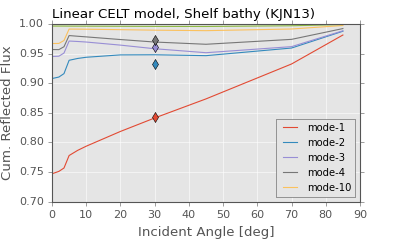

[ 0.99649687  0.99647709  0.99646727  0.9963941   0.99635188  0.99631095
  0.9961189   0.99592983  0.99582039  0.99700141  0.99910923]


In [13]:

fig,ax=plt.subplots(figsize=(5,3))
plt.subplots_adjust(left=0.13,bottom=0.16)
#ax.plot(angles,np.sum(Fr,axis=0))
ind = [1,2,3,4,10,-1]
lin = []
for ii in ind[:-1]:
    ll,=ax.plot(angles,(np.cumsum(Fl,axis=0)[ii,:]).T,label='mode-%d'%ii)
    lin.append(ll)
alll=np.sum(Fr,axis=0)+np.sum(Fl,axis=0)
ax.plot(angles,alll)
ax.legend(loc=4,fontsize=9)
print np.sum(Fr,axis=0)+np.sum(Fl,axis=0)
modelF=np.cumsum(np.array([344.,36.1,12.1,5])/408.)
for ii in range(4):
    ax.plot(30,modelF[ii],'d',color = lin[ii].get_color())
ax.set_ylabel('Cum. Reflected Flux')
ax.set_xlabel('Incident Angle [deg]')
ax.set_title('Linear CELT model, Shelf bathy (KJN13)',loc='left',fontsize=12)
if 1:
    jmkprint('LinearCELTShelf','CELTModel.ipynb')
    

## Compare step to very supercritical to what we have.

  - show plots of response
  - compare energy fluxes

### Step

In [99]:
dat=[None]*60
tit = [None]*60
keys = ['u','p','h','A','B','c','k','K','Fin','Fref','X0','H0','x','z']

In [265]:
if 0:
    H0,X0,A0,N2,omega,f,nu,x,y,z=setup(1,10)  
    for ang in [0.,30.,60.]:
        [u,p,h,A,B,c,k,K]=octave.CELTang(H0,X0,A0,N2,omega,f,nu,x,y,z,ang)
        out=octave.CELTang(H0,X0,A0,N2,omega,f,nu,x,y,z,ang)
        Fin = c*np.abs(A)**2*np.real(k/K)*H0*0.5*rho0
        Fref = c*np.abs(B)**2*np.real(k/K)*H0*0.5*rho0
        out = [u,p,h,A,B,c,k,K,Fin,Fref,X0,H0,x,z]
        dat+=[dict(zip(keys,out))]
        tit+=['Step %d deg'%ang]
        print (Fin/Fin[1,0])[0:6,:]
        print (Fref/Fin[1,0])[0:6,:]

[[  0.00000000e+00   2.71792189e-02]
 [  1.00000000e+00   7.51661959e-05]
 [  0.00000000e+00   1.86275852e-05]
 [  0.00000000e+00   6.23253959e-06]
 [  0.00000000e+00   2.43529656e-06]
 [  0.00000000e+00   1.33107723e-06]]
[[  4.39912221e-03   0.00000000e+00]
 [  9.67722302e-01   0.00000000e+00]
 [  9.41303077e-05   0.00000000e+00]
 [  1.27298906e-04   0.00000000e+00]
 [  1.32470698e-04   0.00000000e+00]
 [  6.50422897e-05   0.00000000e+00]]
[[  0.00000000e+00   1.12267132e-17]
 [  1.00000000e+00   1.37799767e-03]
 [  0.00000000e+00   8.97907648e-04]
 [  0.00000000e+00   2.04100567e-04]
 [  0.00000000e+00   7.12976738e-05]
 [  0.00000000e+00   3.72279832e-05]]
[[  1.00247109e-17   0.00000000e+00]
 [  9.53791627e-01   0.00000000e+00]
 [  1.03602568e-02   0.00000000e+00]
 [  1.23589240e-02   0.00000000e+00]
 [  1.10972868e-02   0.00000000e+00]
 [  4.28605268e-03   0.00000000e+00]]
[[  0.00000000e+00   1.93045956e-17]
 [  1.00000000e+00   3.85549215e-03]
 [  0.00000000e+00   2.58998696e-0

In [333]:
H0,X0,A0,N2,omega,f,nu,x,y,z=setup(40,1.5,maxdepth=5000)  
num = 0
for ang in [0,30,60]:
    [u,p,h,A,B,c,k,K]=octave.CELTangJ(H0,X0,A0,N2,omega,f,nu,x,y,z,ang)
    Fin = c*np.abs(A)**2*np.real(k/K)*H0*0.5*rho0
    Fref = c*np.abs(B)**2*np.real(k/K)*H0*0.5*rho0
    out = [u,p,h,A,B,c,k,K,Fin,Fref,X0,H0,x,z]
    dat[num]=dict(zip(keys,out))
    tit[num]='Narrow %d deg'%ang
    print (Fin/Fin[1,0])[0:6,[0,-1]]
    print (Fref/Fin[1,0])[0:6,[0,-1]]
    num+=1

[[  0.00000000e+00   3.30607643e-02]
 [  1.00000000e+00   7.11276729e-05]
 [  0.00000000e+00   1.06207858e-03]
 [  0.00000000e+00   1.09234980e-04]
 [  0.00000000e+00   3.67091892e-06]
 [  0.00000000e+00   2.98080118e-06]]
[[  6.36951842e-03   0.00000000e+00]
 [  9.57804800e-01   0.00000000e+00]
 [  6.95574323e-04   0.00000000e+00]
 [  2.17742711e-04   0.00000000e+00]
 [  1.61398715e-04   0.00000000e+00]
 [  9.04116279e-05   0.00000000e+00]]
[[  0.00000000e+00   1.36841217e-17]
 [  1.00000000e+00   2.57259700e-03]
 [  0.00000000e+00   2.29650821e-03]
 [  0.00000000e+00   2.45955383e-04]
 [  0.00000000e+00   1.23511352e-04]
 [  0.00000000e+00   5.32390237e-05]]
[[  1.64810546e-17   0.00000000e+00]
 [  9.30715067e-01   0.00000000e+00]
 [  1.01829329e-02   0.00000000e+00]
 [  1.78297471e-02   0.00000000e+00]
 [  1.81865658e-02   0.00000000e+00]
 [  7.66381328e-03   0.00000000e+00]]
[[  0.00000000e+00   2.37893863e-17]
 [  1.00000000e+00   7.23154091e-03]
 [  0.00000000e+00   5.34139134e-0

In [334]:
H0,X0,A0,N2,omega,f,nu,x,y,z=setup(40,40.,maxdepth=5000)  
num = 6
for ang in [0,30,60]:
    [u,p,h,A,B,c,k,K]=octave.CELTangJ(H0,X0,A0,N2,omega,f,nu,x,y,z,ang)
    Fin = c*np.abs(A)**2*np.real(k/K)*H0*0.5*rho0
    Fref = c*np.abs(B)**2*np.real(k/K)*H0*0.5*rho0
    out = [u,p,h,A,B,c,k,K,Fin,Fref,X0,H0,x,z]
    dat[num]=dict(zip(keys,out))
    tit[num]='Shelf %d deg'%ang
    print (Fin/Fin[1,0])[0:6,[0,-1]]
    print (Fref/Fin[1,0])[0:6,[0,-1]]

[[  0.00000000e+00   2.46034938e-02]
 [  1.00000000e+00   1.89511739e-04]
 [  0.00000000e+00   1.84027847e-04]
 [  0.00000000e+00   2.75438374e-05]
 [  0.00000000e+00   1.63057544e-04]
 [  0.00000000e+00   6.49400046e-06]]
[[ 0.00467737  0.        ]
 [ 0.74231365  0.        ]
 [ 0.16086686  0.        ]
 [ 0.03725427  0.        ]
 [ 0.01179045  0.        ]
 [ 0.00482214  0.        ]]
[[  0.00000000e+00   6.92844447e-18]
 [  1.00000000e+00   4.72247743e-04]
 [  0.00000000e+00   6.68096710e-04]
 [  0.00000000e+00   1.41765256e-04]
 [  0.00000000e+00   5.54823394e-05]
 [  0.00000000e+00   8.90396819e-06]]
[[  8.62130498e-17   0.00000000e+00]
 [  8.41243481e-01   0.00000000e+00]
 [  1.06795433e-01   0.00000000e+00]
 [  1.01843962e-02   0.00000000e+00]
 [  1.13188856e-02   0.00000000e+00]
 [  1.30534280e-02   0.00000000e+00]]
[[  0.00000000e+00   7.95561180e-18]
 [  1.00000000e+00   1.00512234e-03]
 [  0.00000000e+00   8.46688664e-04]
 [  0.00000000e+00   2.21347246e-04]
 [  0.00000000e+00  

In [336]:
print shape(dat)

(6,)


<IPython.core.display.Javascript object>


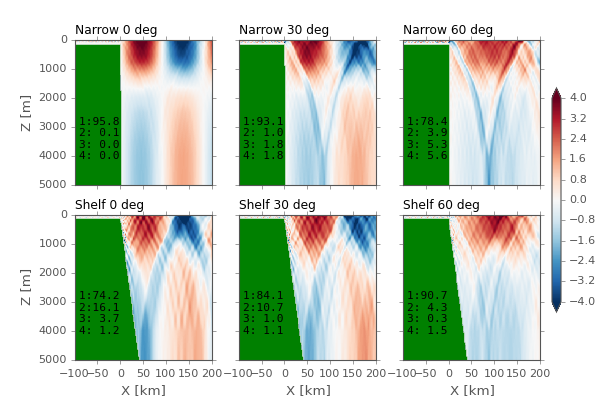

nan
nan
nan
nan
nan
nan


In [342]:
fig,axs=plt.subplots(2,3,sharex=True,sharey=True,figsize=(7.5,5.));axs=axs.flatten()
for nn,ii in enumerate([0,1,2,3,4,5]):
    
    dd = dat[ii]
    
    ax=axs[nn]
    # try to get the best phase...
    ind = np.where(-dd['x'].flatten()>=50.0e3)[0][-1]
    norm = dd['u'][ind,10]/np.abs(dd['u'][ind,10])
    print np.real(np.conj(norm)*dd['u'][ind,0])
    if np.real(np.conj(norm)*dd['u'][ind,0])<0.:
        print 'phase by 180'
        norm=norm*np.exp(1.j*np.pi)
    pcm=ax.pcolormesh(-dd['x'].flatten()/1e3,dd['z'],np.real(dd['u']*np.conj(norm)).T,rasterized=True,cmap=plt.cm.RdBu_r)
    pcm.set_clim([-4.,4.])
    ax.set_ylim([5000,0])
    xx=np.zeros(len(dd['X0'])*2+2);hh=np.zeros(len(dd['X0'])*2+2)
    xx[0]=-1e6;xx[-1]=1e6
    hh[0]=dd['H0'][0];hh[-1]=dd['H0'][-1]
    for ij in range(len(dd['H0'])-1):
        xx[2*ij+1]=dd['X0'][ij]
        hh[2*ij+1]=dd['H0'][ij]
        xx[2*ij+2]=dd['X0'][ij]
        hh[2*ij+2]=dd['H0'][ij+1]
    ax.fill_between(-xx/1e3,hh,y2=5000,facecolor='green')
    ax.set_xlim([-99.,200.])
    st=''
    for jj in range(1,5):
        st+='%d:%4.1f \n'%(jj,100*(dd['Fref']/dd['Fin'][1,0])[jj,0])
    ax.text(-90.,4500.,st,family='monospace')
    if nn>=3:
        ax.set_xlabel('X [km]')
    if nn%3==0:
        ax.set_ylabel('Z [m]')
    ax.set_title(tit[ii],fontsize=11,loc='left')
colorbarRight(pcm,axs,fig,shrink=0.7,extend='both',width=0.015,gap=0.02)


In [6]:
dat = dat[:9]
tit = tit[:9]
H0,X0,A0,N2,omega,f,nu,x,y,z=setup(40,40.,maxdepth=5000)  
for ang in [0,30,60]:
    [u,p,h,A,B,c,k,K]=octave.CELTang(H0,X0,A0,N2,omega,f,nu,x,y,z,ang)
    Fin = c*np.abs(A)**2*np.real(k/K)*H0*0.5*rho0
    Fref = c*np.abs(B)**2*np.real(k/K)*H0*0.5*rho0
    out = [u,p,h,A,B,c,k,K,Fin,Fref,X0,H0]
    dat+=[dict(zip(keys,out))]
    tit+=['Shelf SK %d deg'%ang]
    print (Fin/Fin[1,0])[0:6,[0,-1]]
    print (Fref/Fin[1,0])[0:6,[0,-1]]

NameError: name 'dat' is not defined

<IPython.core.display.Javascript object>


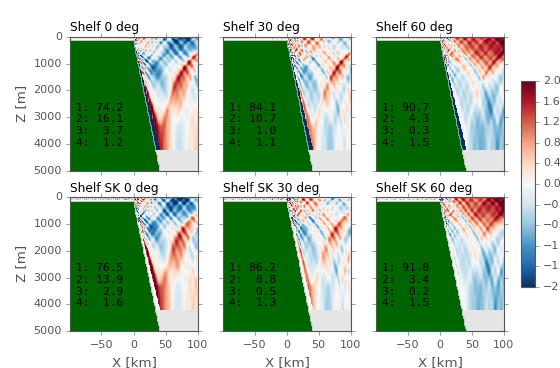

In [206]:
fig,axs=plt.subplots(2,3,sharex=True,sharey=True,figsize=(7,4.6));axs=axs.flatten()
for nn,ii in enumerate([6,7,8,9,10,11]):
    
    dd = dat[ii]
    
    ax=axs[nn]
    pcm=ax.pcolormesh(-x.flatten()/1e3,z,np.real(dd['u']).T,rasterized=True,cmap=plt.cm.RdBu_r)
    pcm.set_clim([-2.,2.])
    ax.set_ylim([5000,0])
    xx=np.zeros(len(dd['X0'])*2+2);hh=np.zeros(len(dd['X0'])*2+2)
    xx[0]=-1e6;xx[-1]=1e6
    hh[0]=dd['H0'][0];hh[-1]=dd['H0'][-1]
    for ij in range(len(dd['H0'])-1):
        xx[2*ij+1]=dd['X0'][ij]
        hh[2*ij+1]=dd['H0'][ij]
        xx[2*ij+2]=dd['X0'][ij]
        hh[2*ij+2]=dd['H0'][ij+1]
    ax.fill_between(-xx/1e3,hh,y2=5000,facecolor='darkgreen')
    ax.set_xlim([-99.,100.])
    st=''
    for jj in range(1,5):
        st+='%d: %4.1f \n'%(jj,100*(dd['Fref']/dd['Fin'][1,0])[jj,0])
    ax.text(-90.,4500.,st,family='monospace')
    if nn>=3:
        ax.set_xlabel('X [km]')
    if nn%3==0:
        ax.set_ylabel('Z [m]')
    ax.set_title(tit[ii],fontsize=11,loc='left')
colorbarRight(pcm,axs,fig,shrink=0.7)

### Get a cross section from data...


In [6]:
tidecyc=20
D=hdf5storage.loadmat('../ttide15/Tas3d/Real1km03/Diags%04d.mat'%(tidecyc*360))
print D.keys()

['vEbc', 'uEbc', 'vPbc', 'Conv', 'Ebc', 'uPbc', 'vPbt', 'Ebc0', 'Depth', 'U', 'y', 'x', 'z', 'uPbt']


<IPython.core.display.Javascript object>


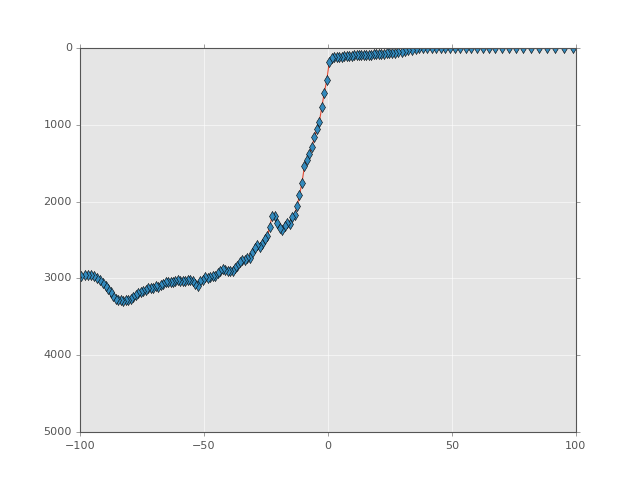

248
[ 1000.]


(-100.0, 100.0)

In [7]:
fig,ax=plt.subplots()
ind = where(D['y']/1.e3>=130.)[0][0]
print ind
indy=1*ind
ax.plot(-D['x']/1e3,D['Depth'][ind,:])
ax.plot(-D['x']/1e3,D['Depth'][ind,:],'d')
ax.set_ylim([5000,0])
indd = where(D['x']>0.)[0][0]
print diff(D['x'][indd+[0,1]])
xlim([-100.,100.])

In [8]:
DX=3.
ind = where((-D['x']/1.e3 >-100.+DX) & (-D['x']/1.e3 <0.+DX))
X0=D['x'][ind][::2]

H0 = D['Depth'][indy,ind][0]
H0 = H0[::-1][::2]

H0=np.append(H0,H0[-1])
H0 = -np.sort(-H0)
bad = where(diff(H0)>=0.)[0]
print bad
for b in bad:
    H0[bad]=H0[bad-1]-0.1
print shape(H0)
print shape(X0)
print H0[0],H0[-1]
print diff(H0)
X0-=X0[-1]
X0=X0-DX

[49]
(51,)
(50,)
3286.89609405 121.924653048
[ -3.55828286e+00  -1.67812238e+01  -3.16713948e+00  -4.33393719e+01
  -3.81032833e+01  -8.00491236e+00  -2.69796316e+01  -2.56057377e+01
  -2.12790946e+01  -1.69988796e+00  -9.48441493e+00  -1.69605146e+01
  -2.27150593e+01  -3.63325828e+00  -5.92490964e+00  -2.45475168e+00
  -2.17337258e+00  -2.79775767e+00  -8.35839139e+00  -1.09315225e+00
  -3.78376772e+01  -3.93033724e-01  -9.88805333e+00  -1.18137770e+01
  -8.28231271e+00  -5.30984982e+01  -3.20987612e+00  -3.58890148e+00
  -2.44134183e+01  -8.49585801e+01  -2.07023017e+01  -3.16292713e+01
  -1.28821868e+02  -1.17239198e+01  -1.10762302e+02  -1.40319110e+02
  -1.67533317e+01  -6.93304308e+00  -2.77172093e+01  -1.04566908e+02
  -1.06092281e+01  -2.57274773e+02  -3.76149752e+02  -1.57749257e+02
  -2.20268145e+02  -2.01928476e+02  -3.80223383e+02  -3.94996187e+02
  -1.00000000e-01  -6.41447005e+01]


<IPython.core.display.Javascript object>


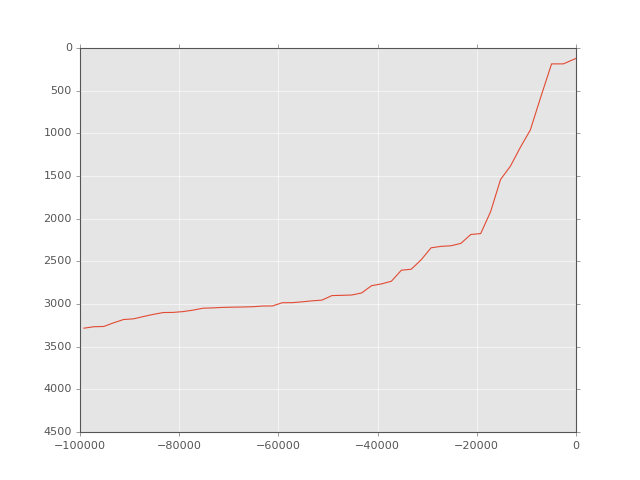

(4500, 0)

In [453]:
fig,ax=plt.subplots()
ax.plot(X0,H0[1:])
ax.set_ylim(4500,0)

In [20]:
num = 20
Nx=140
X0 = np.linspace(-150.,0.,Nx)*1.e3
H0n,X0n,A0,N2,omega,f,nu,x,y,z=setup(Nx-1,40.,maxdepth=max(H0),Nz=1700)  
    
N2 = np.tile(N2[:,-1],(Nx,1))
x=np.arange(-200.,40.,1.)*1.e3
z = np.arange(0.,5000.,4.)
for y0 in [130,240,460]:
    # get H0:
    indy = where(D['y']/1.e3>=y0)[0][0]
    xx = D['x'][:]
    dd = D['Depth'][indy,:]
    ind = np.where(dd<=200.)[0][-1]+1
    xx = xx-xx[ind]
    H0 = np.interp(-X0,xx,dd)
    H0 = np.random.rand(len(X0))+H0
    H0=-np.sort(-H0)
    ind = np.where(diff(H0)==0)[0]
    H0[ind+1]=H0[ind]+1.
    X0=X0[1:]
    H0n,X0n,A0,N2,omega,f,nu,x,y,z=setup(Nx-1,40.,maxdepth=max(H0),Nz=1700)  
    
    ang=0.
    #dat=dat[:9]
    #tit=tit[:9]
    for ang in [0,30.,60.]:
        [u,p,h,A,B,c,k,K]=octave.CELTangJ(H0,X0,A0,N2,omega,f,nu,x,y,z,ang)
        Fin = c*np.abs(A)**2*np.real(k/K)*H0*0.5*rho0
        Fref = c*np.abs(B)**2*np.real(k/K)*H0*0.5*rho0
        out = [u,p,h,A,B,c,k,K,Fin,Fref,X0,H0,x,z]
        dat[num]=dict(zip(keys,out))
        tit[num]='Real y = %d km: %d deg'%(y0,ang)
        num+=1
#[u,p,h,A,B,c,k,K]=octave.CELTangJ(H0,X0,A0,N2,omega,f,nu,x,y,z,ang)


ValueError: too many values to unpack

In [131]:
Fin = c*np.abs(A)**2*np.real(k/K)*H0*0.5*rho0
Fref = c*np.abs(B)**2*np.real(k/K)*H0*0.5*rho0
print (Fin/Fin[1,0])[0:20,[0,-1]]
print (Fref/Fin[1,0])[0:20,[0,-1]]


[[  0.00000000e+00   3.90705806e-18]
 [  1.00000000e+00   6.43077236e-03]
 [  0.00000000e+00   6.50817552e-04]
 [  0.00000000e+00   9.44937625e-04]
 [  0.00000000e+00   6.18287455e-05]
 [  0.00000000e+00   2.25069637e-04]
 [  0.00000000e+00   1.08986072e-03]
 [  0.00000000e+00   3.37637911e-04]
 [  0.00000000e+00   1.77262427e-05]
 [  0.00000000e+00   9.88634209e-07]
 [  0.00000000e+00   1.17819065e-03]
 [  0.00000000e+00   1.27364291e-04]
 [  0.00000000e+00   4.86416953e-06]
 [  0.00000000e+00   1.61183239e-06]
 [  0.00000000e+00   2.73399873e-05]
 [  0.00000000e+00   2.42412795e-05]
 [  0.00000000e+00   2.11564316e-05]
 [  0.00000000e+00   7.37395859e-06]
 [  0.00000000e+00   5.11333341e-06]
 [  0.00000000e+00   2.82850316e-06]]
[[  2.66930190e-18   0.00000000e+00]
 [  8.96685001e-01   0.00000000e+00]
 [  1.07064460e-02   0.00000000e+00]
 [  4.07806124e-02   0.00000000e+00]
 [  3.45255335e-03   0.00000000e+00]
 [  1.41633671e-02   0.00000000e+00]
 [  3.17513223e-03   0.00000000e+00]


<IPython.core.display.Javascript object>


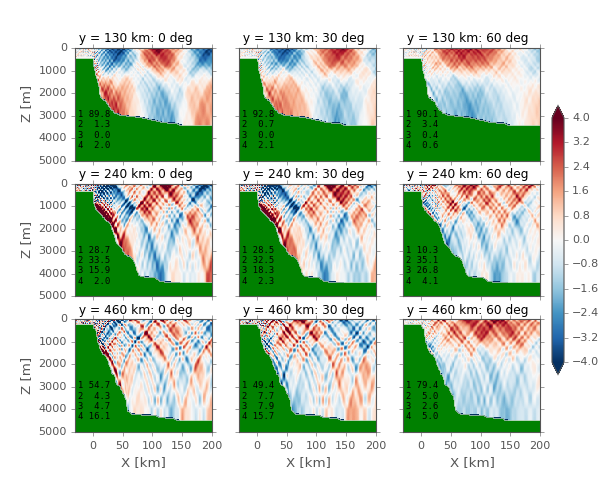

(-0.27317748314+0.961963649368j)
(-0.352950980933+0.935641814509j)
(0.707747501472-0.706465479808j)
(-0.718511259381+0.695515327036j)
(-0.875631372216+0.482980020281j)
(-0.0803735647984-0.99676481182j)
(-0.940603053681+0.339508314192j)
(-0.731607188244-0.681726427616j)
(0.00261114931457-0.999996590944j)


In [153]:
fig,axs=plt.subplots(3,3,sharex=True,sharey=True,figsize=(7.5,6.));axs=axs.flatten()
for nn,ii in enumerate(range(20,29)):
    
    dd = dat[ii]
    ind = np.where(-dd['x'].flatten()>=125.0e3)[0][-1]
   
    norm = dd['u'][ind,10]/np.abs(dd['u'][ind,10])
    print norm
    ax=axs[nn]
    pcm=ax.pcolormesh(-dd['x'].flatten()/1e3,dd['z'],np.real(dd['u']*np.conj(norm)).T,rasterized=True,cmap=plt.cm.RdBu_r)
    pcm.set_clim([-4.,4.])
    ax.set_ylim([5000,0])
    xx=np.zeros(len(dd['X0'])*2+2);hh=np.zeros(len(dd['X0'])*2+2)
    xx[0]=-1e6;xx[-1]=1e6
    hh[0]=dd['H0'][0];hh[-1]=dd['H0'][-1]
    for ij in range(len(dd['H0'])-1):
        xx[2*ij+1]=dd['X0'][ij]
        hh[2*ij+1]=dd['H0'][ij]
        xx[2*ij+2]=dd['X0'][ij]
        hh[2*ij+2]=dd['H0'][ij+1]
    ax.fill_between(-xx/1e3,hh,y2=5000,facecolor='green')
    ax.set_xlim([-30.,200.])
    st=''
    for jj in range(1,5):
        st+='%d %4.1f \n'%(jj,100*(dd['Fref']/dd['Fin'][1,0])[jj,0])
    ax.text(-25.,4900.,st,family='monospace',fontsize=8)
    if nn>=6:
        ax.set_xlabel('X [km]')
    if nn%3==0:
        ax.set_ylabel('Z [m]')
    ax.set_title(tit[ii][4:],fontsize=11,loc='left')
colorbarRight(pcm,axs,fig,shrink=0.7,extend='both',gap=0.02,width=0.02)
if 1: 
    jmkprint('RealReflExamp','CELTModel.ipynb')
    

I am trying to get an idea of the average reflectivity as a function of $y$ here.  The first attempt was pretty good, but `CELTangJ` can only handle uni-directional. `CELTang` can do both directions, but is *so* slow!  

In [12]:
# get 30 degree reflection a number of y:
num = 20
Nx=140
X0 = np.linspace(-150.,0.,Nx)*1.e3
H0n,X0n,A0,N2,omega,f,nu,x,y,z=setup(Nx-1,40.,maxdepth=max(H0),Nz=1700)  
ys = np.arange(20.,600.,10.)
#ys = ys[13:]
#ys = [120.]
Nx=140
X0 = np.linspace(-150.,0.,Nx)*1.e3
N2 = np.tile(N2[:,-1],(Nx,1))
ang = 30.
x=np.arange(-200.,40.,1.)*1.e3
z = np.arange(0.,5000.,4.)
nn=0
Freff=np.zeros((20,len(ys)))
for y0 in ys:
    indy = where(D['y']/1.e3>=y0)[0][0]
    print y0
    xx = D['x'][:]
    dd = D['Depth'][indy,:]
    ind = np.where(dd<=200.)[0][-1]+1
    xx = xx-xx[ind]
    H0 = np.interp(-X0,xx,dd)
    H0 = np.random.rand(len(X0))+H0
    H0=-np.sort(-H0)
    ind = np.where(diff(H0)==0)[0]
    H0[ind+1]=H0[ind]+1.
    X0=X0[1:]
    #print z
    H0h,X0h,A0,N2,omega,f,nu,x,y,z=setup(Nx-1,10,Nz=1500,maxdepth=max(H0))  
    [u,p,h,A,B,c,k,K]=octave.CELTangJ(H0,X0,A0,N2,omega,f,nu,x,y,z,ang)
    Fin = c*np.abs(A)**2*np.real(k/K)*H0*0.5*rho0
    Fref = c*np.abs(B)**2*np.real(k/K)*H0*0.5*rho0
    Freff[:,nn]=Fref[:,0]/Fin[1,0]
    print Freff[1:5,nn]
    print 'Hi'
    #H0=-np.sort(-H0)
    #[u,p,h,A,B,c,k,K]=octave.CELTangJ(H0,X0,A0,N2,omega,f,nu,x,y,z,ang)
    #Fin = c*np.abs(A)**2*np.real(k/K)*H0*0.5*rho0
    #Fref = c*np.abs(B)**2*np.real(k/K)*H0*0.5*rho0
    #Freff[:,nn]=Fref[:,0]/Fin[1,0]
    #print Freff[1:5,nn]
    nn+=1


20.0
[ 0.75306853  0.03289817  0.04562271  0.04551551]
Hi
30.0
[ 0.82110166  0.02105571  0.01803187  0.01131556]
Hi
40.0
[ 0.67009758  0.06528869  0.08246057  0.03958873]
Hi
50.0
[ 0.6542914   0.09247671  0.07175419  0.03799247]
Hi
60.0
[ 0.78413856  0.06373011  0.05726773  0.0163589 ]
Hi
70.0
[ 0.8907185   0.01664657  0.04623429  0.00736885]
Hi
80.0
[ 0.88316164  0.04464609  0.03411647  0.00917571]
Hi
90.0
[  9.49073966e-01   1.21669605e-02   9.87026840e-03   7.48081238e-04]
Hi
100.0
[ 0.90718427  0.00632633  0.01185953  0.01486746]
Hi
110.0
[ 0.84195258  0.05045674  0.04680154  0.02171309]
Hi
120.0
[ 0.86497316  0.02033993  0.05636557  0.00335455]
Hi
130.0
[  9.62045323e-01   2.15211396e-04   3.34177543e-03   2.26052022e-03]
Hi
140.0
[  9.49233828e-01   7.53211401e-03   1.32947202e-02   7.79276981e-04]
Hi
150.0
[  9.57615564e-01   5.95207119e-04   4.91086309e-03   4.37709249e-04]
Hi
160.0
[ 0.95276458  0.0042635   0.00376149  0.00193048]
Hi
170.0
[ 0.95612476  0.0016347   0.00227688 

In [30]:
hdf5storage.savemat('ReflectivityTas30.mat',{'Freff':Freff,'README':'CELTModel.ipynb','ys':ys})

<IPython.core.display.Javascript object>


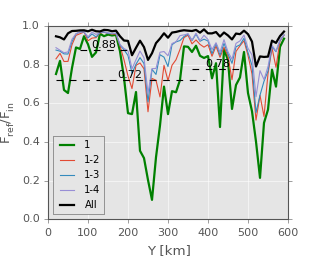

(20, 58)
(58,)
(19, 58)
0.0999418353383
0.962045323372


In [4]:
datin=hdf5storage.loadmat('ReflectivityTas30.mat')

Freff = datin['Freff']
ys = datin['ys']

fig,ax=plt.subplots(figsize=(4,3.3))
fig.subplots_adjust(bottom=0.17,left=0.15)
print shape(np.cumsum(Freff,axis=0))
print shape(ys)
print shape(Freff[1:,:])
cs=np.cumsum(Freff[1:,:],axis=0).T
ax.plot(ys,Freff[1,:],'g',linewidth=2,label='1')
for i in range(2,5):
    ax.plot(ys,cs[:,i],label='1-%d'%i)
ax.plot(ys,cs[:,-1],color='k',linewidth=2,label='All')
#ax.plot(ys,np.cumsum(FreffSK[1:,:],axis=0).T)
indd = np.where((ys>75.) & (ys<210.))[0]
ax.plot(ys[indd],np.mean(Freff[1,indd])+0.*indd,'k--')
text(np.mean(ys[indd]),np.mean(Freff[1,indd]),'%1.2f'%np.mean(Freff[1,indd]),
    ha='center',va='bottom')
indd = np.where((ys>350.) & (ys<500.))[0]
ax.plot(ys[indd],np.mean(Freff[1,indd])+0.*indd,'k--')
text(np.mean(ys[indd]),np.mean(Freff[1,indd]),'%1.2f'%np.mean(Freff[1,indd]),
    ha='center',va='bottom')
indd = np.where((ys>9.) & (ys<400.))[0]
ax.plot(ys[indd],np.mean(Freff[1,indd])+0.*indd,'k--')
text(np.mean(ys[indd]),np.mean(Freff[1,indd]),'%1.2f'%np.mean(Freff[1,indd]),
    ha='center',va='bottom')

#ax.plot(ys,Freff[1,:],'g',linewidth=2,label='1')
#ax.plot(ys,FreffSK[1,:],'m',linewidth=2)
ax.legend(loc=3,fontsize=9,frameon=True)
ax.set_ylabel('$F_{ref}/F_{in}$')
ax.set_xlabel('Y [km]')
print min(Freff[1,:])
print max(Freff[1,:])

if 1:
    jmkprint('TwoDReflectivity','CELTModel.ipynb')
    

Try different weightings for the reflectivity:

  1. Straight mean
  2. Weighted by incoming flux
  3. Weighted by diffracted flux


0.708387603852


<IPython.core.display.Javascript object>


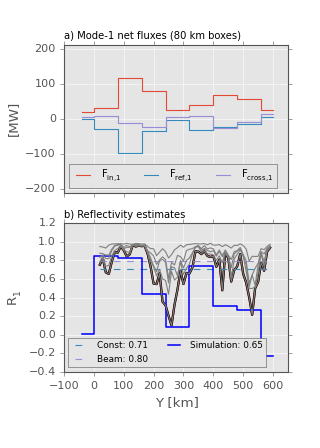

0.796581553458
[ 0.01095337  0.85134512  0.8249478   0.44185592  0.0840769   0.73689676
  0.31383271  0.26871452 -0.22760225]
[  20.35968304   32.1089024   118.29745751   80.34086217   27.12090849
   41.21168033   69.06398726   56.37439903   26.01648051]
[ -0.22300709 -27.33575734 -97.58922744 -35.4990852   -2.28024192
 -30.36875358 -21.67453822 -15.14861935   5.92140941]


In [198]:
# just mean from 0 to 600 km:
print(np.mean(Freff[1,:]))
fig,ax0=plt.subplots(2,1,figsize=(4,5.6),sharex=True)
ax=ax0[[1,0,0]]
fig.subplots_adjust(bottom=0.17,left=0.2)
legnam = ['Const','Beam']


ax[0].plot(ys,Freff[1,:],linewidth=2.)
ax[0].plot(ys,Freff[1,:],'k',linewidth=2.)
mm=np.mean(Freff[1,:])
ax[0].plot(ys,np.mean(Freff[1,:])+0.*ys,'--',label='%s: %1.2f'%(legnam[0],mm))
#ax[1].plot(ys,1.+0.*ys)
#ax[1].plot(ys,1.+0.*ys,label='%s: %1.2f'%(legnam[0],mm))
for num,name in enumerate(['RiseNoSh1km03']):
    nm = legnam[num+1]
    Modes=hdf5storage.loadmat('../ttide15/Tas3d/%s/Modes.mat'%(name))
    time =19
    D=hdf5storage.loadmat('../ttide15/Tas3d/%s/Diags%04d.mat'%(name,time*360))
    dec=1
    mode =0
    u = Modes['UmAmp'][mode,::dec,::dec]*exp(1j*(Modes['UmPha'][mode,::dec,::dec]))
    v = Modes['VmAmp'][mode,::dec,::dec]*exp(1j*(Modes['VmPha'][mode,::dec,::dec]))
    p = Modes['PmAmp'][mode,::dec,::dec]*exp(1j*(Modes['PmPha'][mode,::dec,::dec]))
    x=Modes['x']
    y=Modes['y']
    inx = where((x>0.) & (x<80.))[0][-1]
    uP=(real(p)*real(u)+imag(p)*imag(u))
    P = uP[:,inx]
    P = np.interp(ys,y,P)
    iny = np.where((ys>0.)&(ys<=400.))[0]
    mm=np.sum(P[iny]*Freff[1,iny])/np.sum(P[iny])
    print(mm)
    #ax[1].plot(ys,P/np.mean(P))    
    ax[0].plot(ys,mm+0.*ys,'--',label='%s: %1.2f'%(nm,mm))
print -(Pref)/Pin
ax[0].step(yy,-(Pref)/Pin,where='mid',color='b',linewidth=1.4,label='Simulation: 0.65')

# add higher modes:
for mode in range(2,6):
    ax[0].plot(ys,np.sum(Freff[:mode,:],axis=0),'0.5',)
ax[0].plot(ys,np.sum(Freff,axis=0),'0.5',)
ax[0].set_ylabel(r'$R_1$')
ax[0].set_ylim([-0.4,1.2])

#ax[1].set_xlabel('Y [km]')
#ax[1].set_ylabel(r'weight=$F_{in}/\left<F_{in}\right>$')
ax[0].legend(fontsize=8,loc=3,ncol=2)

ax[2].step(yy,Pin,label=r'$F_{in,1}$',where='mid')
ax[2].step(yy,Pref,label=r'$F_{ref,1}$',where='mid')
ax[2].step(yy,Pcross,label=r'$F_{cross,1}$',where='mid')
ax[2].legend(loc=3,fontsize=9,ncol=3)
ax[2].set_ylim(np.array([-80.,80.])*dy/30.)
ax[2].set_ylabel('[MW]')
ax[0].set_xlim([-100,650.])
ax[0].set_xlabel('Y [km]')
import jmkfigure
ax[2].set_title('a) Mode-1 net fluxes (%d km boxes)'%dy,loc='left',fontsize=9)
ax[0].set_title('b) Reflectivity estimates',loc='left',fontsize=9)
print Pin
print Pref
if 1: 
    jmkprint('TwoDReflectivity','CELTModel.ipynb')

In [6]:
# first make a helper function to do the energy budget.  
def getReflect(In,To,mode):
    phatoff=0
    aa=1./2.
    ui = In['UmAmp'][mode,::dec,::dec]*exp(1j*(In['UmPha'][mode,::dec,::dec]+phatoff))
    vi = In['VmAmp'][mode,::dec,::dec]*exp(1j*(In['VmPha'][mode,::dec,::dec]+phatoff))
    pin = In['PmAmp'][mode,::dec,::dec]*exp(1j*(In['PmPha'][mode,::dec,::dec]+phatoff))
    x=In['x']
    y=In['y']
    uPi=aa*(real(pin)*real(ui)+imag(pin)*imag(ui))
    vPi=aa*(real(pin)*real(vi)+imag(pin)*imag(vi))
    
    ut = To['UmAmp'][mode,::dec,::dec]*exp(1j*(To['UmPha'][mode,::dec,::dec]))
    vt = To['VmAmp'][mode,::dec,::dec]*exp(1j*(To['VmPha'][mode,::dec,::dec]))
    pt = To['PmAmp'][mode,::dec,::dec]*exp(1j*(To['PmPha'][mode,::dec,::dec]))    
    uPt=aa*(real(pt)*real(ut)+imag(pt)*imag(ut))
    vPt=aa*(real(pt)*real(vt)+imag(pt)*imag(vt))
    H = To['Depth']

    ur=ut-ui
    vr=vt-vi
    pr=pt-pin
    
    uPr=aa*(real(pr)*real(ur)+imag(pr)*imag(ur))
    vPr=aa*(real(pr)*real(vr)+imag(pr)*imag(vr))
    uPc = aa*(real(pr)*real(ui)+real(pin)*real(ur)+
              imag(pr)*imag(ui)+imag(pin)*imag(ur))
    vPc = aa*(real(pr)*real(vi)+real(pin)*real(vr)+
              imag(pr)*imag(vi)+imag(pin)*imag(vr))
    
    Pr=uPr+1j*vPr
    Pt=uPt+1j*vPt
    Pi=uPi+1j*vPi
    Pc = uPc+1j*vPc
    
    return Pi,Pr,Pc,Pt

incoming='RiseNoSh1km03'
total = 'Real1km03'
In = hdf5storage.loadmat('../ttide15/Tas3d/%s/Modes.mat'%(incoming))
To = hdf5storage.loadmat('../ttide15/Tas3d/%s/Modes.mat'%(total))
Pi,Pr,Pc,Pt = getReflect(In,To,1-1)

208


<IPython.core.display.Javascript object>


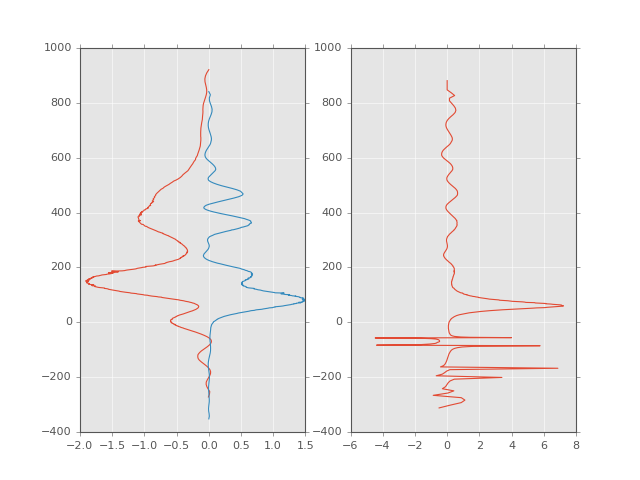

(608,)
0.630756110615


In [16]:
x=In['x']
ind = np.where(x>80.)[0][0]
print ind
y = In['y']

fig,ax=plt.subplots(1,2)
dy=np.sin(30.*np.pi/180.)*80
ax[0].plot(np.real(Pi[:,ind]),y+dy)
ax[0].plot(np.real(Pr[:,ind]),y-dy)

pin = np.interp(y,y+dy,np.real(Pi[:,ind]))
pref = np.interp(y,y-dy,np.real(Pr[:,ind]))
ax[1].plot(-pref/pin,y)
print shape(pin)
rat = -pref/pin
print mean(rat)


In [186]:
# small box budgets on Pi and Pr:
dy = 80
indx = np.where((x<=80.)&(x>0.))[0]

Pin = np.zeros(800/dy)
Pref = np.zeros(800/dy)
Pcross = np.zeros(800/dy)
yy = np.zeros(800/dy)
for nn,y0 in enumerate(np.arange(-dy,700,dy)):
    indy = np.where((y>y0)&(y<=y0+dy))[0]
    # right side
    Pin[nn] = -np.sum(np.real(Pi[indy[:-1],indx[-1]])*diff(y[indy]))
    # bottom
    Pin[nn] += np.sum(np.imag(Pi[indy[0],indx[:-1]])*diff(x[indx]))
    #top
    Pin[nn] += -np.sum(np.imag(Pi[indy[-1],indx[:-1]])*diff(x[indx]))
    
    #right side
    Pref[nn] = -np.sum(np.real(Pr[indy[:-1],indx[-1]])*diff(y[indy]))
    # bottom
    Pref[nn] += np.sum(np.imag(Pr[indy[0],indx[:-1]])*diff(x[indx]))
    #top
    Pref[nn] += -np.sum(np.imag(Pr[indy[-1],indx[:-1]])*diff(x[indx]))
    
    #right side
    Pcross[nn] = -np.sum(np.real(Pc[indy[:-1],indx[-1]])*diff(y[indy]))
    # bottom
    Pcross[nn] += np.sum(np.imag(Pc[indy[0],indx[:-1]])*diff(x[indx]))
    #top
    Pcross[nn] += -np.sum(np.imag(Pc[indy[-1],indx[:-1]])*diff(x[indx]))
    yy[nn]=y0+dy/2.
Pin = Pin[:nn] 
Pref = Pref[:nn] 
Pcross=Pcross[:nn]
yy=yy[:nn]

<IPython.core.display.Javascript object>


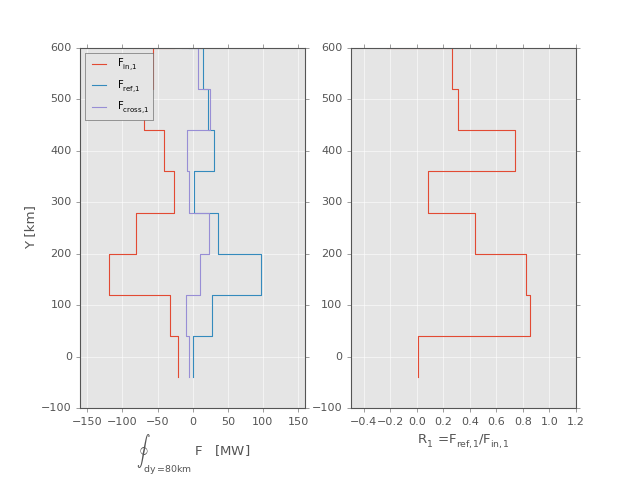

[ 0.01095337  0.85134512  0.8249478   0.44185592  0.0840769   0.73689676
  0.31383271  0.26871452 -0.22760225]
[ 1.28276864  0.45932788  0.0910757   0.2702091   1.11023585  0.45692799
  0.33241941  0.58891413  1.82721281]


In [187]:
fig,ax=plt.subplots(1,2)
fig.subplots_adjust(bottom=0.15)
ax[0].step(-Pin,yy,label=r'$F_{in,1}$',where='pre')
ax[0].step(-Pref,yy,label=r'$F_{ref,1}$',where='pre')
ax[0].step(-Pcross,yy,label=r'$F_{cross,1}$',where='pre')
ax[0].legend(loc=2,fontsize=9)
ax[0].set_xlim(np.array([-80.,80.])*dy/40.)
ax[0].set_xlabel('$\oint_{dy=%d km}\ F\ \ \  $[MW]'%dy)
ax[0].set_ylabel('Y [km]')
#ax[1].step((Pref+Pin+0.*Pcross)/Pin,yy)
ax[1].step(-(Pref)/Pin,yy,where='pre')
print -(Pref)/Pin
print (Pref+Pin+Pcross)/Pin
ax[1].set_xlim([-0.5,1.2])
ax[1].set_xlabel(r'$R_1 = F_{ref,1}/F_{in,1}$')

In [52]:
print Pin

print Pref+Pcross
print (Pref+Pcross)/Pin

print Pref
print (Pref)/Pin

[  6.26069473  25.50931149  50.21217832  66.42723545  50.42577352
  28.90941982  16.04124224  10.79538727  16.02818506  24.63074427
  33.19448657  33.22555739  29.36786233  23.05682799  15.04256636
   9.2216424    5.09721028   4.26962253   3.58210238   1.15098946]
[ -3.02671301 -14.18264175 -37.23797992 -69.5818445  -35.09231544
 -22.68916363  -3.51269303   6.36314689  -7.30097289 -15.33960832
 -15.09323713 -29.01430209 -32.71574331  10.9183887   -6.80190993
  28.51675565  -0.93500508  -1.93571646   0.51869884   2.10954356]
[-0.48344683 -0.55597901 -0.74161252 -1.04748969 -0.69592022 -0.78483635
 -0.21897887  0.58943202 -0.4555084  -0.62278298 -0.45469109 -0.87325253
 -1.11399812  0.47354253 -0.45217749  3.09237275 -0.18343467 -0.45336946
  0.14480291  1.83280875]
[ -5.0144204  -21.93431887 -54.37581563 -41.94384365 -27.19507263
  -7.522312     6.84511398  -9.22197992 -12.44267949 -17.43600771
 -24.32409934   4.08577929 -15.33918698   2.29683024  -5.80787597
  12.22305488   1.44655855 

In [4]:
sigma  =2.*np.pi/12.4/3600
f = 1e-4
print sigma/f

1.40752359032


In [7]:
2*np.pi/6e-5/1000

104.71975511965977